**CODSOFT INTERNSHIP**

**TASK 3 : IRIS FLOWER CLASSIFICATION**

---

**TASK DESCRIPTION:**


*   The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.
* Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks


---

Importing Libraries :

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

Loading the Dataset :

In [26]:
iris_flower_file = pd.read_csv("IRIS.csv")

Checking for the initial data :

In [27]:
iris_flower_file.head(18)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Checking for the Dimensions :

In [28]:
iris_flower_file.shape

(150, 5)

Checking Dataset Information :

In [29]:
iris_flower_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Checking Dataset Summary :

In [30]:
print(iris_flower_file.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [31]:
iris_flower_file.info()
print(iris_flower_file.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


Checking for different categories of Species :

In [32]:
print(iris_flower_file['species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Generating Statistical Summary :

In [33]:
iris_flower_file.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Graph for Distribution Frequency for each Feature :

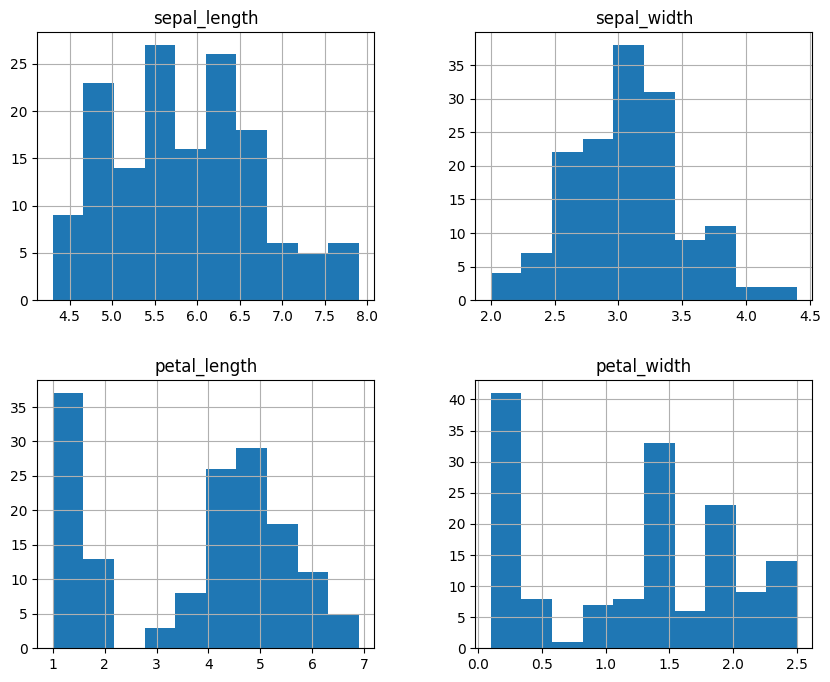

In [34]:
iris_flower_file.hist(figsize=(10,8))
plt.show()

Graph for Sepal length Vs Petal  Width :

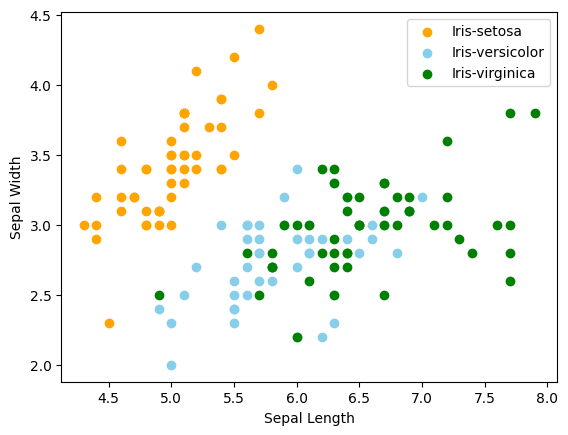

In [35]:
colors = ['orange', 'skyblue', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for i in range(3):
    x = iris_flower_file[iris_flower_file['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

Graph for Sepal Width Vs Petal Width :

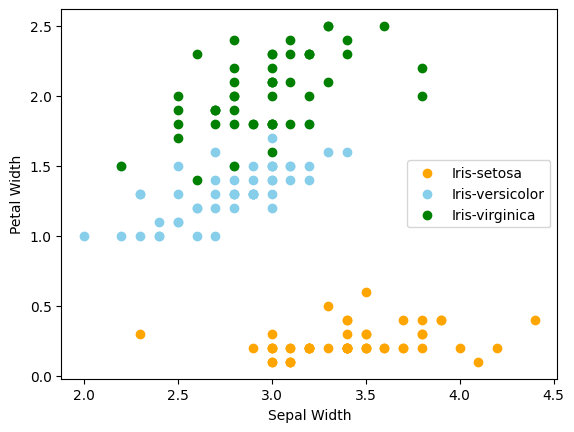

In [36]:
for i in range(3):
    x = iris_flower_file[iris_flower_file['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c=colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

Correlation Heatmap :

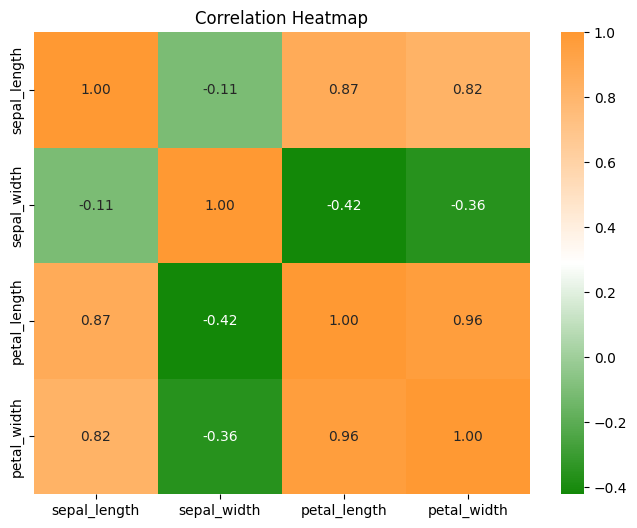

In [37]:
from matplotlib.colors import LinearSegmentedColormap
numeric_columns = iris_flower_file.drop(columns='species')
corr = numeric_columns.corr()

colors = ["#138808", "#FFFFFF", "#FF9933"]
j_cmap = LinearSegmentedColormap.from_list("Colours", colors)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap=j_cmap, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Label Encoding & Feature Scaling :

In [38]:
le = LabelEncoder()
iris_flower_file['species'] = le.fit_transform(iris_flower_file['species'])

scaler = StandardScaler()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_flower_file[features] = scaler.fit_transform(iris_flower_file[features])

Data Splitting :

In [39]:
x = iris_flower_file.drop(columns='species')
y = iris_flower_file['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Training of Model :

In [40]:
knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
KNN = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
KNN.fit(x_train, y_train)

LR = LogisticRegression(max_iter=200)
LR.fit(x_train, y_train)

dt_params = {'max_depth': [None, 3, 5], 'criterion': ['gini', 'entropy']}
DT = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
DT.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5]})

Model Evaluation :

In [41]:
LR_accuracy = LR.score(x_test, y_test) * 100
KNN_accuracy = KNN.score(x_test, y_test) * 100
DT_accuracy = DT.score(x_test, y_test) * 100

print(f"Logistic Regression Accuracy: {LR_accuracy:.2f}%")
print(f"KNN Accuracy: {KNN_accuracy:.2f}%")
print(f"Decision Tree Accuracy: {DT_accuracy:.2f}%")

Logistic Regression Accuracy: 100.00%
KNN Accuracy: 100.00%
Decision Tree Accuracy: 95.56%
